<a href="https://colab.research.google.com/github/syilmazs/MachineLearning/blob/main/soldier_race_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (9,5)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

import plotly
import cufflinks as cf
#Enabling the offline mode for interactive plotting locally
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()
#To display the plots
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [5]:
df_m = pd.read_csv("https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr", encoding='latin-1')
df_m.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458

In [6]:
df_f = pd.read_csv("https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq")
df_f.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,263,466,65,338,301,141,1011,223,836,587,476,360,1336,274,922,245,1095,759,557,310,35,65,16,220,713,91,246,316,265,517,432,1028,75,182,184,141,548,191,314,69,345,388,966,645,363,399,435,496,447,55,404,118,335,368,1268,113,362,235,1062,327,148,803,809,513,1647,1560,1280,1013,622,174,736,430,110,844,1488,406,295,850,217,345,942,657,152,756,Female,5-Oct-10,Fort Hood,Regular Army,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,250,430,64,294,270,126,893,186,900,583,483,350,1440,261,839,206,1234,835,549,329,32,60,23,208,726,91,249,341,247,468,463,1117,78,187,189,138,535,180,307,60,315,335,1048,595,340,375,483,532,492,69,334,115,302,345,1389,110,426,259,1014,346,142,835,810,575,1751,1665,1372,1107,524,152,771,475,125,901,1470,422,254,708,168,329,1032,534,155,815,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,276,450,69,309,270,128,987,204,861,583,466,384,1451,287,874,223,1226,821,643,374,36,65,26,204,790,100,265,343,262,488,469,1060,84,198,195,146,588,207,331,70,356,399,1043,655,345,399,470,530,469,64,401,135,325,369,1414,122,398,258,1049,362,164,904,855,568,1779,1711,1383,1089,577,164,814,458,129,882,1542,419,269,727,159,367,1035,663,162,799,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,276,484,68,340,294,144,1012,253,897,599,471,372,1430,269,1008,285,1170,804,640,351,38,62,22,244,775,97,265,331,309,529,455,1069,80,192,186,153,593,206,332,68,337,402,1029,655,392,435,469,520,478,67,402,118,357,386,1329,115,394,250,1121,333,157,875,815,536,1708,1660,1358,1065,679,187,736,463,125,866,1627,451,302,923,235,371,999,782,173,818,Female,5-Oct-10,Fort Hood,Regular Army,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,336,525,67,300,295,135,1281,284,811,607,467,433,1362,305,1089,290,1112,726,686,356,34,65,18,233,732,88,247,339,260,596,447,1039,78,183,187,140,522,181,308,63

In [7]:
df_m.shape

(4082, 108)

In [8]:
df_f.shape

(1986, 108)

In [9]:
df = pd.concat([df_m, df_f], axis=0, ignore_index=True)
df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference,SubjectId
0,10027.0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand,NaN
1,10032.0,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand,NaN
2,10033.0,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand,NaN
3,10092.0,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand,NaN
4,10093.0,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372

In [10]:
df.shape

(6068, 109)

In [11]:
df2 = df.copy()

In [12]:
df.info(verbose= True) # Verbose enables to see all the feature if there are too many features. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 109 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    subjectid                       float64
 1    abdominalextensiondepthsitting  int64  
 2    acromialheight                  int64  
 3    acromionradialelength           int64  
 4    anklecircumference              int64  
 5    axillaheight                    int64  
 6    balloffootcircumference         int64  
 7    balloffootlength                int64  
 8    biacromialbreadth               int64  
 9    bicepscircumferenceflexed       int64  
 10   bicristalbreadth                int64  
 11   bideltoidbreadth                int64  
 12   bimalleolarbreadth              int64  
 13   bitragionchinarc                int64  
 14   bitragionsubmandibulararc       int64  
 15   bizygomaticbreadth              int64  
 16   buttockcircumference            int64  
 17   buttockdepth

In [13]:
df.duplicated().sum()

0

In [14]:
df.isnull().sum()

subjectid                         1986
abdominalextensiondepthsitting       0
acromialheight                       0
acromionradialelength                0
anklecircumference                   0
axillaheight                         0
balloffootcircumference              0
balloffootlength                     0
biacromialbreadth                    0
bicepscircumferenceflexed            0
bicristalbreadth                     0
bideltoidbreadth                     0
bimalleolarbreadth                   0
bitragionchinarc                     0
bitragionsubmandibulararc            0
bizygomaticbreadth                   0
buttockcircumference                 0
buttockdepth                         0
buttockheight                        0
buttockkneelength                    0
buttockpopliteallength               0
calfcircumference                    0
cervicaleheight                      0
chestbreadth                         0
chestcircumference                   0
chestdepth               

In [15]:
drop_list = []
for col in df:
  if df[col].isnull().sum()>1800:
    print(f"{col}={df[col].isnull().sum()}")
    drop_list.append(col),
drop_list

subjectid=1986
Ethnicity=4647
SubjectId=4082


['subjectid', 'Ethnicity', 'SubjectId']

As a general approah for the dataframes which columns with too many (1/3) missing values it is better to drop these columns.

In [16]:
df.drop(drop_list, axis=1, inplace=True)

In [17]:
df["Heightin"].value_counts()

69    628
70    573
71    557
66    554
68    532
67    519
72    478
64    386
65    324
73    291
63    274
74    236
62    229
75    117
61    102
60     83
76     68
77     36
59     35
78     15
80      7
57      6
79      5
58      5
56      3
81      2
87      1
86      1
94      1
Name: Heightin, dtype: int64

In [ ]:
# df.drop(columns= ("subjectid", "Ethnicity", "SubjectId", axis=1, inplace=True)  # as a second option to drop columns without for loop.

In [19]:
df.isnull().sum().any()

False

In [20]:
df.shape

(6068, 106)

In [21]:
df.select_dtypes("object")

,Gender,Date,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,WritingPreference
0,Male,4-Oct-10,Fort Hood,Regular Army,Combat Arms,19D,North Dakota,Right hand
1,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,Left hand
2,Male,4-Oct-10,Fort Hood,Regular Army,Combat Support,68W,New York,Left hand
3,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,88M,Wisconsin,Right hand
4,Male,12-Oct-10,Fort Hood,Regular Army,Combat Service Support,92G,North Carolina,Right hand
...,...,...,...,...,...,...,...,...
6063,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,Right hand
6064,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,25U,Texas,Right hand
6065,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,42A,Texas,Right hand
6066,Female,5-Apr-12,Camp Shelby,Army National Guard,Combat Support,92Y,Texas,Right hand


In [22]:
for col in df.select_dtypes("object"):
  print(f"{col} has {df[col].nunique()} unique value")

Gender has 2 unique value
Date has 253 unique value
Installation has 12 unique value
Component has 3 unique value
Branch has 3 unique value
PrimaryMOS has 285 unique value
SubjectsBirthLocation has 152 unique value
WritingPreference has 3 unique value


In [23]:
df.DODRace.unique()

array([1, 2, 3, 4, 5, 6, 8])

In [24]:
df.DODRace.value_counts()

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64


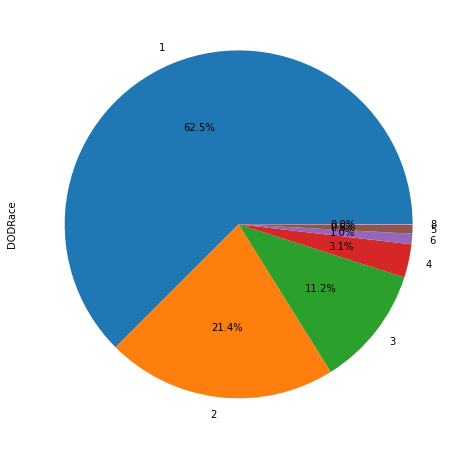

In [25]:
print(df.DODRace.value_counts())
df.DODRace.value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(8,8));

In [26]:
df.DODRace = df.DODRace.map({
    1: "White",
    2: "Black",
    3: "Hispanic",
    4: "Asian",
    5: "Native American",
    6: "Pacific Islander",
    8: "Other"
})

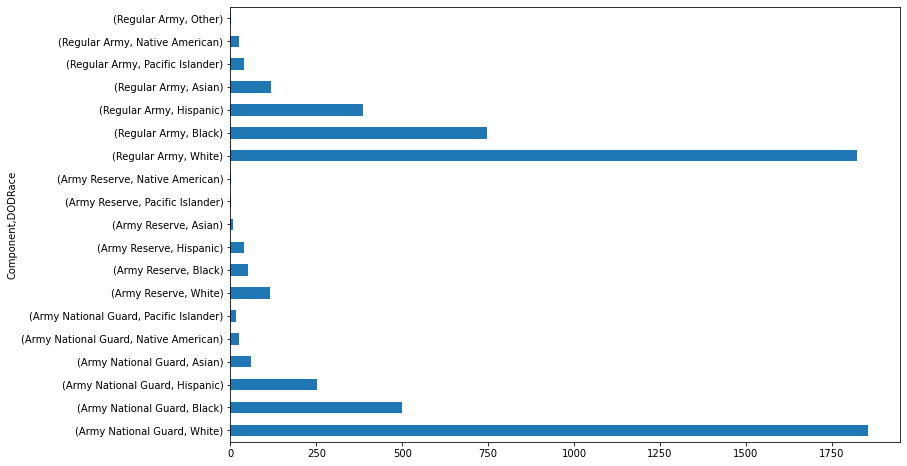

In [27]:
df.groupby(["Component"])["DODRace"].value_counts().plot(kind="barh", figsize=(12,8))

In [28]:
df.groupby(["Component", "Branch"])["DODRace"].value_counts()

Component            Branch                  DODRace         
Army National Guard  Combat Arms             White               623
                                             Black                79
                                             Hispanic             74
                                             Asian                18
                                             Native American       9
                                             Pacific Islander      4
                     Combat Service Support  White               917
                                             Black               312
                                             Hispanic            142
                                             Asian                33
                                             Pacific Islander     11
                                             Native American      10
                     Combat Support          White               315
                                         

There are three main ethnic class in the data. Rest of the classes have less than 500 observations. Model will not learn enough in these classes. I will drop these observations. Moreover, I did not get any insight from Component and Branch features. Because these fetaures have no effect on ethnicity. Self-reported features will also unnecessary since the relevant data included in another features.    

In [29]:
df.drop(columns=["Component", "Branch", "Installation", "Date", "PrimaryMOS", "Weightlbs", "Heightin", "SubjectNumericRace"], axis=1, inplace =True)

In [30]:
df.shape

(6068, 98)

In [31]:
df.sample(1)

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,DODRace,Age,WritingPreference
3031,252,1421,322,220,1304,255,207,419,383,287,521,74,346,331,144,1046,266,869,620,507,414,1512,293,1077,253,1266,831,568,331,40,69,21,253,820,101,277,327,320,548,466,1097,85,199,192,150,563,201,343,71,344,386,1063,625,396,416,486,543,488,72,423,120,392,417,1401,123,425,262,1194,354,152,933,873,582,1777,1761,1425,1104,636,173,765,455,136,886,1701,515,312,915,242,400,1019,875,173,828,Male,California,Asian,34,Right hand


In [32]:
df.DODRace.value_counts()

White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: DODRace, dtype: int64

In [33]:
df = df[(df.DODRace=="White") | (df.DODRace == "Black") | (df.DODRace== "Hispanic")]

In [ ]:
df.reset_index(drop=True, inplace=True)

In [34]:
df.DODRace.value_counts()

White       3792
Black       1298
Hispanic     679
Name: DODRace, dtype: int64

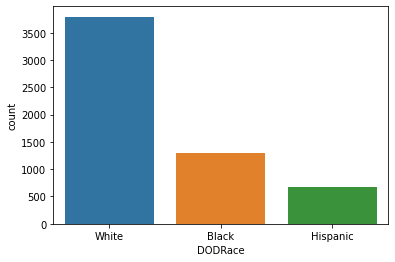

In [35]:
sns.countplot(df.DODRace);

In [36]:
df.shape

(5769, 98)

## Explore Data

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
abdominalextensiondepthsitting,5769.0,247.254290,37.457748,155.0,220.0,243.0,272.0,451.0
acromialheight,5769.0,1408.630265,78.303123,1146.0,1353.0,1412.0,1464.0,1683.0
acromionradialelength,5769.0,328.071590,20.444554,249.0,314.0,328.0,342.0,393.0
anklecircumference,5769.0,225.201768,15.965783,156.0,214.0,225.0,235.0,293.0
axillaheight,5769.0,1301.902583,71.260913,1062.0,1252.0,1304.0,1351.0,1553.0
balloffootcircumference,5769.0,244.408043,16.803556,186.0,233.0,245.0,256.0,306.0
balloffootlength,5769.0,195.118911,13.379000,151.0,186.0,196.0,205.0,245.0
biacromialbreadth,5769.0,399.706015,30.124094,283.0,377.0,404.0,422.0,489.0
bicepscircumferenceflexed,5769.0,341.663027,41.270615,216.0,312.0,342.0,370.0,490.0
bicristalbreadth,5769.0,274.903449,19.239580,197.0,262.0,274.0,288.0,362.0


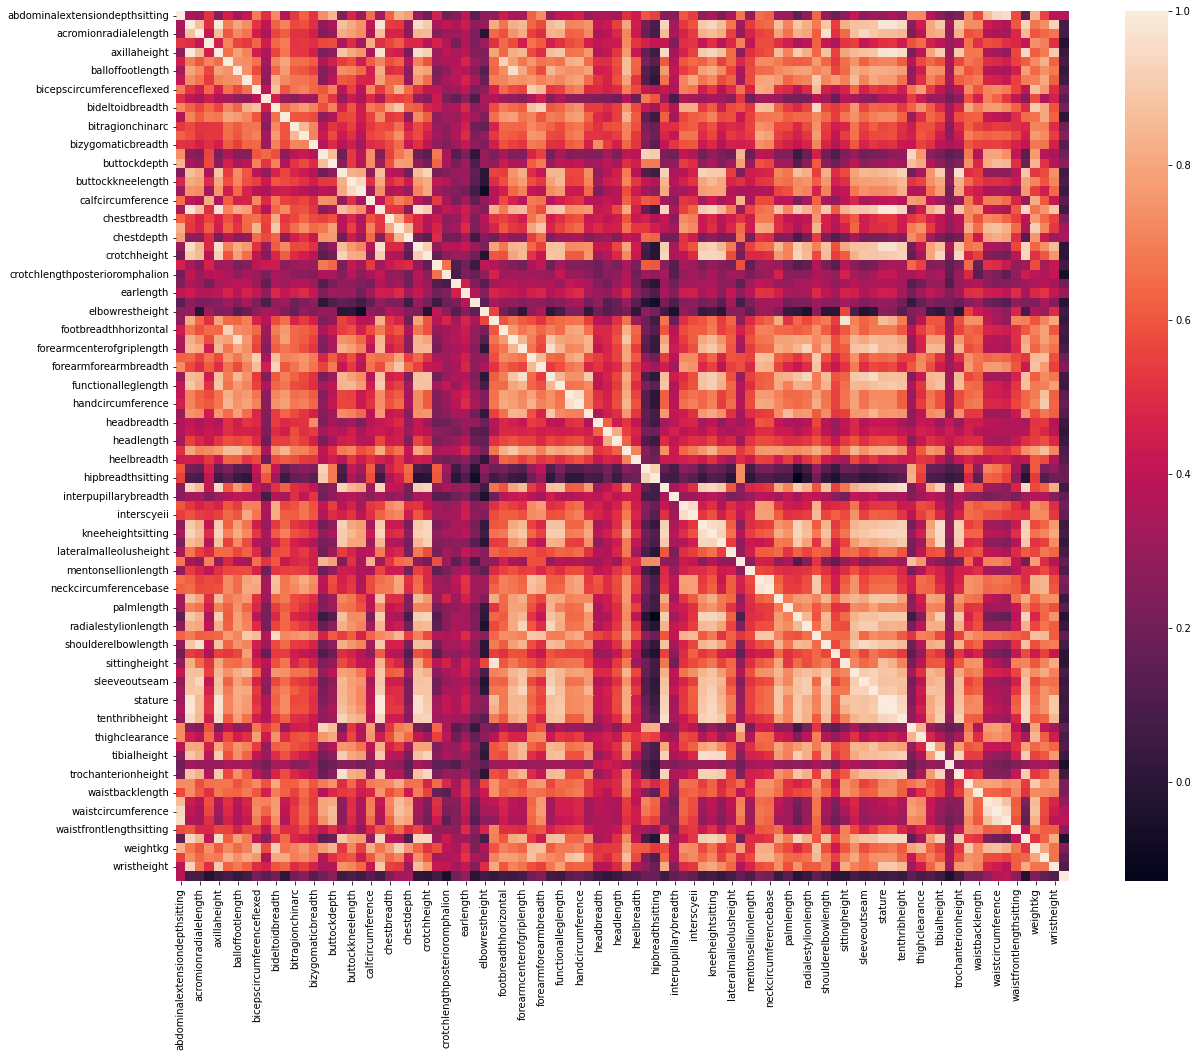

In [38]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr())

In [39]:
df_temp = df.corr()

feature =[]
collinear=[]
for col in df_temp.columns:
    for i in df_temp.index:
        if (df_temp[col][i]>= .9 and df_temp[col][i] < 1) or (df_temp[col][i]<= -.9 and df_temp[col][i] > -1) :
                feature.append(col)
                collinear.append(i)
                #print(f"multicolinearity alert in between {col} - {i}")

In [40]:
my_dict = {"feature":feature, "collinear":collinear}
df_col = pd.DataFrame(my_dict)
df_col

,feature,collinear
0,abdominalextensiondepthsitting,waistcircumference
1,abdominalextensiondepthsitting,waistdepth
2,acromialheight,axillaheight
3,acromialheight,cervicaleheight
4,acromialheight,chestheight
5,acromialheight,iliocristaleheight
6,acromialheight,kneeheightsitting
7,acromialheight,stature
8,acromialheight,suprasternaleheight
9,acromialheight,tenthribheight


In [41]:
df_col.shape

(286, 2)

In [42]:
df_col.value_counts("feature")

feature
kneeheightsitting                 19
iliocristaleheight                15
tenthribheight                    15
axillaheight                      14
waistheightomphalion              14
crotchheight                      14
cervicaleheight                   14
kneeheightmidpatella              12
suprasternaleheight               12
chestheight                       11
tibialheight                      11
acromialheight                    10
poplitealheight                   10
span                               9
trochanterionheight                9
stature                            9
lateralfemoralepicondyleheight     7
buttockheight                      7
sleeveoutseam                      6
forearmhandlength                  5
radialestylionlength               4
shoulderelbowlength                3
functionalleglength                3
waistcircumference                 3
bideltoidbreadth                   3
weightkg                           3
forearmcenterofgriplength     

I can see that there are lots of strongly correlated features which causes multicollinearity.



# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [43]:
X = df.drop("DODRace", axis=1)
y = df.DODRace

In [44]:
X = pd.get_dummies(data=X, drop_first= True) # in gradient descent model like logistic regression we need to convert dummies features. We do not need to get_dummies in tree based models.

In [45]:
X.shape

(5769, 232)

In [46]:
y.shape

(5769,)

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size=0.2, random_state=42, stratify=y)

In [49]:
print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)

Train features shape :  (4615, 232)
Train target shape   :  (4615,)
Test features shape  :  (1154, 232)
Test target shape    :  (1154,)


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [50]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [51]:
from sklearn.pipeline import Pipeline
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]  # in default model class_weight=None. Using balanced class weight get better recall scores for hispanic class.
pipe_log_model = Pipeline(steps=operations)

In [52]:
pipe_log_model.fit(X_train,y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[238  12  10]
 [  6 107  23]
 [ 13  93 652]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92       260
    Hispanic       0.50      0.79      0.61       136
       White       0.95      0.86      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 971   36   31]
 [  21  454   68]
 [  67  356 2611]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.87      0.88      4615



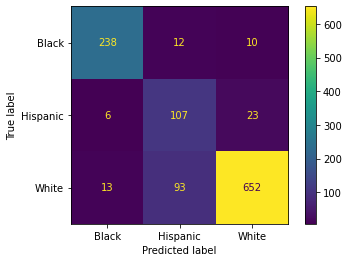

In [53]:
plot_confusion_matrix(pipe_log_model, X_test, y_test)

Data is imbalance and Black class have good scores. But white and Hispanic classes having noise. Especially Hispanic class have to many false negatives. Therfore I will focus on these White and Hispanic classes.

In [54]:
scoring = {"f1_hispanic_white" : make_scorer(f1_score, average = "macro", labels =["Hispanic", "White"]),
           "precision_hispanic_white" : make_scorer(precision_score, average = "macro", labels =["Hispanic", "White"]),
           "recall_hispanic_white" : make_scorer(recall_score, average = "macro", labels =["Hispanic", "White"])}

In [55]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=42))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_hispanic_white           0.751111
test_precision_hispanic_white    0.724844
test_recall_hispanic_white       0.810313
dtype: float64

In [56]:
log_model_score = df_scores.mean()[2:3]
log_model_score

test_f1_hispanic_white    0.751111
dtype: float64

### Logistic Model GridsearchCV

In [67]:
f1_hispanic_white =  make_scorer(f1_score, average="macro", labels=["Hispanic", "White"])

In [68]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=42))]  
model = Pipeline(steps=operations)

In [69]:
penalty = ["l1", "l2"]
C = [0.1, 1, 3, 5, 10]

param_grid = {
    "log__C": [0.1, 1, 3, 5, 10],
    'log__penalty': ["l1", "l2"],
    'log__solver': ['liblinear', 'lbfgs'],
}

In [70]:
log_grid_model = GridSearchCV(model, param_grid, scoring=f1_hispanic_white,  n_jobs=-1,  verbose=3, cv=5) 

In [71]:
log_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'log__C': [0.1, 1, 3, 5, 10],
                         'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             scoring=make_scorer(f1_score, average=macro, labels=['Hispanic', 'White']),
             verbose=3)

In [72]:
log_grid_model.best_params_

{'log__C': 3, 'log__penalty': 'l1', 'log__solver': 'liblinear'}

In [73]:
log_grid_model.best_score_

0.79232026089793

In [74]:
y_pred = log_grid_model.predict(X_test)
y_pred

array(['Black', 'White', 'White', ..., 'Black', 'White', 'White'],
      dtype=object)

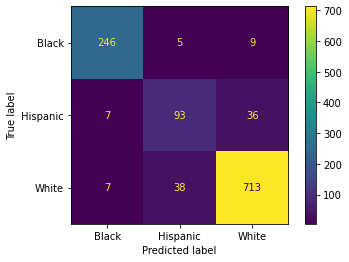

In [75]:
plot_confusion_matrix(log_grid_model, X_test, y_test)

In [76]:
eval_metric(log_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[246   5   9]
 [  7  93  36]
 [  7  38 713]]
              precision    recall  f1-score   support

       Black       0.95      0.95      0.95       260
    Hispanic       0.68      0.68      0.68       136
       White       0.94      0.94      0.94       758

    accuracy                           0.91      1154
   macro avg       0.86      0.86      0.86      1154
weighted avg       0.91      0.91      0.91      1154


Train_Set
[[ 984   13   41]
 [  26  387  130]
 [  40  143 2851]]
              precision    recall  f1-score   support

       Black       0.94      0.95      0.94      1038
    Hispanic       0.71      0.71      0.71       543
       White       0.94      0.94      0.94      3034

    accuracy                           0.91      4615
   macro avg       0.86      0.87      0.87      4615
weighted avg       0.91      0.91      0.91      4615



In [77]:
! pip install yellowbrick

     |████████████████████████████████| 271 kB 8.5 MB/s 
     |████████████████████████████████| 14.8 MB 52.5 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
tensorflow 2.8.0 requires numpy>=1.20, but you have numpy 1.19.5 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


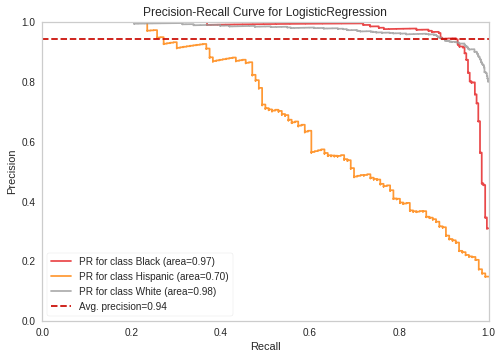

In [78]:
from yellowbrick.classifier import PrecisionRecallCurve # data dengesiz olduğu için ROC yerine bu curve daha doğru sonuç verir.

operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [79]:
viz.score_

{'Black': 0.9719147716366067,
 'Hispanic': 0.7003208707770803,
 'White': 0.9758769497933704,
 'micro': 0.9418114073798092}

In [80]:
y_pred = log_grid_model.predict(X_test)

In [81]:
log_grig_viz_score = viz.score_["Hispanic"]
log_grig_viz_score

0.7003208707770803

In [82]:
log_grid_model_score = f1_score(y_test, y_pred, average="macro", labels=["Hispanic", "White"])  # In multiclass classification average and labels must be defined.
log_grid_model_score

0.8122283873971752

## 2. SVC

### Vanilla SVC model 

In [83]:
operations = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight='balanced',max_iter=10000,random_state=42))]  
pipe_svc_model = Pipeline(steps=operations)

In [84]:
pipe_svc_model.fit(X_train,y_train)
eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[235  15  10]
 [  6 105  25]
 [ 10 104 644]]
              precision    recall  f1-score   support

       Black       0.94      0.90      0.92       260
    Hispanic       0.47      0.77      0.58       136
       White       0.95      0.85      0.90       758

    accuracy                           0.85      1154
   macro avg       0.78      0.84      0.80      1154
weighted avg       0.89      0.85      0.86      1154


Train_Set
[[ 957   39   42]
 [  23  444   76]
 [  61  419 2554]]
              precision    recall  f1-score   support

       Black       0.92      0.92      0.92      1038
    Hispanic       0.49      0.82      0.61       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.86      0.81      4615
weighted avg       0.89      0.86      0.87      4615



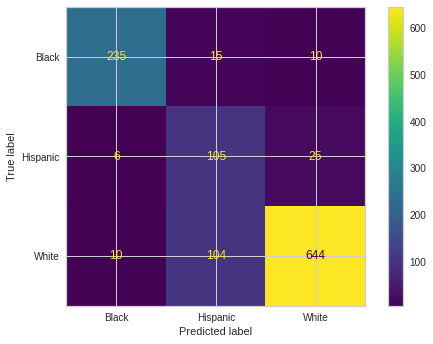

In [85]:
plot_confusion_matrix(pipe_svc_model, X_test, y_test)

In [86]:
scoring = {"f1_hispanic_white" : make_scorer(f1_score, average = "macro", labels =["Hispanic", "White"]),
           "precision_hispanic_white" : make_scorer(precision_score, average = "macro", labels =["Hispanic", "White"]),
           "recall_hispanic_white" : make_scorer(recall_score, average = "macro", labels =["Hispanic", "White"])}

In [87]:
operations = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight='balanced',max_iter=10000,random_state=42))]  
pipe_svc_model = Pipeline(steps=operations)
scores = cross_validate(pipe_svc_model, X_train, y_train, scoring = scoring, cv = 5)
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

test_f1_hispanic_white           0.730866
test_precision_hispanic_white    0.703066
test_recall_hispanic_white       0.798756
dtype: float64

In [88]:
svc_model_score = df_scores.mean()[2:3]
svc_model_score

test_f1_hispanic_white    0.730866
dtype: float64

###  SVC Model GridsearchCV

In [89]:
param_grid = {
    'svc__C': [1,3,5],
    'svc__gamma': ["scale", "auto", 1, 0.1, 0.01]
}

In [90]:
operations = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=42))]
model = Pipeline(steps=operations)

svc_grid_model = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=f1_hispanic_white,
                              n_jobs=-1)

In [91]:
svc_grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 3, 5],
                         'svc__gamma': ['scale', 'auto', 1, 0.1, 0.01]},
             scoring=make_scorer(f1_score, average=macro, labels=['Hispanic', 'White']),
             verbose=3)

In [92]:
svc_grid_model.best_params_

{'svc__C': 3, 'svc__gamma': 0.1}

In [93]:
svc_grid_model.best_score_

0.7544307311622829

In [94]:
eval_metric(svc_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[237  13  10]
 [  8 105  23]
 [  9  94 655]]
              precision    recall  f1-score   support

       Black       0.93      0.91      0.92       260
    Hispanic       0.50      0.77      0.60       136
       White       0.95      0.86      0.91       758

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154


Train_Set
[[ 990   22   26]
 [  12  483   48]
 [  45  290 2699]]
              precision    recall  f1-score   support

       Black       0.95      0.95      0.95      1038
    Hispanic       0.61      0.89      0.72       543
       White       0.97      0.89      0.93      3034

    accuracy                           0.90      4615
   macro avg       0.84      0.91      0.87      4615
weighted avg       0.92      0.90      0.91      4615



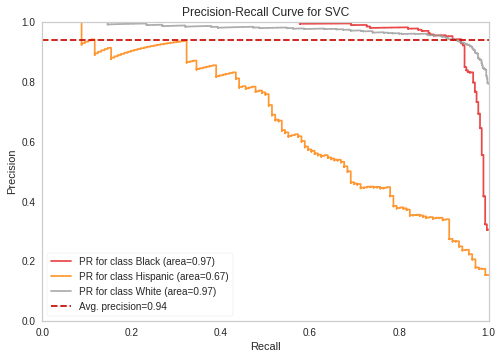

In [95]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(C=2, class_weight="balanced",random_state=101))]
model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [97]:
y_pred = svc_grid_model.predict(X_test)

svc_AP = viz.score_["Hispanic"]
svc_f1 = f1_score(y_test, y_pred, average="macro", labels=["Hispanic", "White"])
svc_recall = recall_score(y_test, y_pred, average="macro", labels=["Hispanic", "White"])

In [98]:
f1_hispanic_white =  make_scorer(f1_score, average="macro", labels=["Hispanic", "White"])

In [99]:
svc_grid_model_score = f1_score(y_test, y_pred, average="macro", labels=["Hispanic", "White"]) 
svc_grid_model_score

0.7546978585396098

## 3. RF

In [100]:
from sklearn.preprocessing import OrdinalEncoder   # We do not use dummy features in tree based models. We need to convert categoric features by OrdinalEncoder.

In [101]:
X2 = df.drop("DODRace",axis=1)
y = df.DODRace

In [102]:
cat = X2.select_dtypes("object").columns
cat

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [103]:
enc = OrdinalEncoder()
X2[cat] = enc.fit_transform(X2[cat])
X2.head()

,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,bicristalbreadth,bideltoidbreadth,bimalleolarbreadth,bitragionchinarc,bitragionsubmandibulararc,bizygomaticbreadth,buttockcircumference,buttockdepth,buttockheight,buttockkneelength,buttockpopliteallength,calfcircumference,cervicaleheight,chestbreadth,chestcircumference,chestdepth,chestheight,crotchheight,crotchlengthomphalion,crotchlengthposterioromphalion,earbreadth,earlength,earprotrusion,elbowrestheight,eyeheightsitting,footbreadthhorizontal,footlength,forearmcenterofgriplength,forearmcircumferenceflexed,forearmforearmbreadth,forearmhandlength,functionalleglength,handbreadth,handcircumference,handlength,headbreadth,headcircumference,headlength,heelanklecircumference,heelbreadth,hipbreadth,hipbreadthsitting,iliocristaleheight,interpupillarybreadth,interscyei,interscyeii,kneeheightmidpatella,kneeheightsitting,lateralfemoralepicondyleheight,lateralmalleolusheight,lowerthighcircumference,mentonsellionlength,neckcircumference,neckcircumferencebase,overheadfingertipreachsitting,palmlength,poplitealheight,radialestylionlength,shouldercircumference,shoulderelbowlength,shoulderlength,sittingheight,sleevelengthspinewrist,sleeveoutseam,span,stature,suprasternaleheight,tenthribheight,thighcircumference,thighclearance,thumbtipreach,tibialheight,tragiontopofhead,trochanterionheight,verticaltrunkcircumferenceusa,waistbacklength,waistbreadth,waistcircumference,waistdepth,waistfrontlengthsitting,waistheightomphalion,weightkg,wristcircumference,wristheight,Gender,SubjectsBirthLocation,Age,WritingPreference
0,266,1467,337,222,1347,253,202,401,369,274,493,71,319,291,142,979,240,882,619,509,373,1535,291,1074,259,1292,877,607,351,36,71,19,247,802,101,273,349,299,575,477,1136,90,214,193,150,583,206,326,70,332,366,1071,685,422,441,502,560,500,77,391,118,400,436,1447,113,437,273,1151,368,145,928,883,600,1782,1776,1449,1092,610,164,786,491,140,919,1700,501,329,933,240,440,1054,815,175,853,1.0,91.0,41,2.0
1,233,1395,326,220,1293,245,193,394,338,257,479,67,344,320,135,944,232,870,584,468,357,1471,269,1021,253,1244,851,615,376,33,62,18,232,781,98,263,348,289,523,476,1096,86,203,195,146,568,201,334,72,312,356,1046,620,441,447,490,540,488,73,371,131,380,420,1380,118,417,254,1119,353,141,884,868,564,1745,1702,1387,1076,572,169,822,476,120,918,1627,432,316,870,225,371,1054,726,167,815,1.0,86.0,35,1.0
2,287,1430,341,230,1327,256,196,427,408,261,544,75,345,330,135,1054,258,901,623,506,412,1501,288,1120,267,1288,854,636,359,40,61,23,237,810,103,270,355,357,575,491,1115,93,220,203,148,573,202,356,70,349,393,1053,665,462,475,496,556,482,72,409,123,403,434,1447,121,431,268,1276,367,167,917,910,604,1867,1735,1438,1105,685,198,807,477,125,918,1678,472,329,964,255,411,1041,929,180,831,1.0,86.0,42,1.0
3,234,1347,310,230,1239,262,199,401,359,262,518,73,328,309,143,991,242,821,560,437,395,1423,296,1114,262,1205,769,590,341,39,66,25,272,794,106,267,352,318,593,467,1034,91,217,194,158,576,199,341,68,338,367,986,640,458,461,460,511,452,76,393,106,407,446,1357,118,393,249,1155,330,148,903,848,550,1708,1655,1346,1021,604,180,803,445,127,847,1625,461,315,857,205,399,968,794,176,793,1.0,133.0,31,2.0
4,250,1585,372,247,1478,267,224,435,356,263,524,80,340,310,138,1029,275,1080,706,567,425,1684,304,1048,232,1452,1014,682,382,32,56,19,188,814,111,305,399,324,605,550,1279,94,222,218,153,566,197,374,69,332,372,1251,675,481,505,612,666,585,85,458,135,398,430,1572,132,523,302,1231,400,180,919,995,641,2035,1914,1596,1292,672,194,962,584,122,1090,1679,467,303,868,214,379,1245,946,188,954,1.0,90.0,21,2.0


In [105]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=42, stratify =y)

In [106]:
print("Train features shape : ", X_train2.shape)
print("Train target shape   : ", y_train2.shape)
print("Test features shape  : ", X_test2.shape)
print("Test target shape    : ", y_test2.shape)

Train features shape :  (4615, 97)
Train target shape   :  (4615,)
Test features shape  :  (1154, 97)
Test target shape    :  (1154,)


### Vanilla RF Model

In [107]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=42)

In [108]:
rf_model.fit(X_train2, y_train2)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [109]:
eval_metric(rf_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[182   1  77]
 [  7   5 124]
 [  8   1 749]]
              precision    recall  f1-score   support

       Black       0.92      0.70      0.80       260
    Hispanic       0.71      0.04      0.07       136
       White       0.79      0.99      0.88       758

    accuracy                           0.81      1154
   macro avg       0.81      0.57      0.58      1154
weighted avg       0.81      0.81      0.76      1154


Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615



In [110]:
model = RandomForestClassifier(class_weight="balanced", random_state=101)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_hispanic_white           0.478037
test_precision_hispanic_white    0.801627
test_recall_hispanic_white       0.515082
dtype: float64

Random forest model clearly seems to have an overfitting problem. Therefore I will change the default parameters.

### RF Model GridsearchCV

In [115]:
param_grid = {'n_estimators':[200,400],
             'max_depth':[10,15,20], 'min_samples_split': [18, 22], 'max_features': ['auto', None, 15, 20]}

In [116]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=101)
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=3,
                             scoring=f1_hispanic_white,
                             n_jobs=-1)

In [ ]:
rf_grid_model.fit(X_train2,y_train2)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [ ]:
rf_grid_model.best_params_

In [ ]:
rf_grid_model.best_score_

In [ ]:
eval_metric(rf_grid_model, X_train2, y_train2, X_test2, y_test2)

In [ ]:
model = RandomForestClassifier(class_weight="balanced", random_state=42, max_depth=10, n_estimators = 500)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [ ]:
y_pred = rf_grid_model.predict(X_test2)

In [ ]:
rf_grid_model_score = f1_score(y_test, y_pred, average="macro", labels=["Hispanic", "White"]) 
rf_grid_model_score

## 4. XGBoost

### Vanilla XGBoost Model

In [ ]:
xgb_model = XGBClassifier(random_state=42)

In [ ]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train2)
classes_weights

In [ ]:
xgb_model.fit(X_train2,y_train2, sample_weight=classes_weights)

In [ ]:
eval_metric(xgb_model, X_train2, y_train2, X_test2, y_test2)

In [ ]:
model = XGBClassifier(random_state=42)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 5, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 6))
df_scores.mean()[2:]

### XGBoost Model GridsearchCV

In [ ]:
comp = pd.DataFrame(classes_weights)

comp["label"]= y_train2.reset_index(drop=True)
comp.groupby("label")[0].value_counts()

In [ ]:
param_grid = {"n_estimators":[100, 300],
              'max_depth':[3,5,6],
              "learning_rate": [0.1, 0.3],
              "subsample":[0.5, 1],
              "colsample_bytree":[0.5, 1]}

In [ ]:
xgb_model = XGBClassifier(random_state=42)
xgb_grid_model = GridSearchCV(xgb_model, 
                              param_grid, 
                              scoring=f1_hispanic_white, 
                              n_jobs = -1, 
                              verbose = 2).fit(X_train2, y_train2,sample_weight=classes_weights)

In [ ]:
xgb_grid_model.best_params_

In [ ]:
xgb_grid_model.best_score_

In [ ]:
eval_metric(xgb_grid_model, X_train2, y_train2, X_test2, y_test2)

In [ ]:
model = XGBClassifier(random_state=42, colsample_bytree=0.5, subsample=0.5)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1",
    sample_weight=classes_weights
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [ ]:
y_pred = xgb_grid_model.predict(X_test2)


In [ ]:
xgb_grid_model_score = f1_score(y_test, y_pred, average="macro", labels=["Hispanic", "White"]) 
xgb_grid_model_score

## Comparing Models

In [ ]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_grid_model_score, svc_grid_model_score, rf_grid_model_score, xgb_grid_model_score]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

In [ ]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=101))]
final_model = Pipeline(steps=operations)

In [ ]:
final_model.fit(X, y)

In [ ]:
X.describe()

In [ ]:
mean_human = X.describe().loc["mean"]
mean_human

In [ ]:
final_model.predict(X.loc[[201]])

In [ ]:
final_model.predict([mean_human])

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [ ]:
!pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

## SVC Over/Under Sampling

## Xgboost Over/ Under Sampling

- Evaluation metrics 
https://towardsdatascience.com/comprehensive-guide-on-multiclass-classification-metrics-af94cfb83fbd

In [ ]:
from sklearn.metrics import matthews_corrcoef

matthews_corrcoef(y_test, y_pred)

0.8245928804749529

In [ ]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.8245928804749529

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [ ]:
# !pip install shap

In [ ]:
import shap
explainer = shap.Explainer(log_model,X_train)
start_index = 203
end_index = 204
shap_values = explainer.shap_values(X_test[start_index:end_index])

ModuleNotFoundError: ignored

In [ ]:
shap_values

In [ ]:
print(shap_values[0].shape)

In [ ]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = log_model.predict(X_test[start_index:end_index])[0]
print(f"The log_model predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index], # for values
                feature_names= X.columns,) 

In [ ]:
shap.summary_plot(shap_values, X_train,max_display=300,feature_names = X.columns)

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# BONUS
In this section I would like to compare self-reported height and weight data to the measured height and weight data. 

###HEIGHT COMPARISON

In [ ]:
df_h = pd.concat([df2.Heightin, df2.stature], axis=1)

In [ ]:
df_h.head()

In [ ]:
df_h.isnull().sum()

In [ ]:
df_h.Heightin = df_h.Heightin*25.4  # to have same metrics converted inches to mm

In [ ]:
df_h.head()

In [ ]:
df_h= df_h.astype("int") 

In [ ]:
df_h.mean()

In [ ]:
height_diff = (df_h["Heightin"].mean()) - (df_h["stature"].mean())
height_diff

In [ ]:
df_h = pd.concat([df.Gender, df_h], axis=1)

In [ ]:
df_h["difference"] = df_h["Heightin"] - df_h["stature"]
df_h

In [ ]:
df_h.diff.mean()

In [ ]:
df_h.describe()

In [ ]:
lower = df_h.difference.quantile(0.25)
lower

In [ ]:
upper= df_h.difference.quantile(0.75)
upper

In [ ]:
iqr = upper-lower

In [ ]:
lower_limit = df_h.difference.quantile(0.25) - (1.5*iqr)
lower_limit

In [ ]:
upper_limit = df_h.difference.quantile(0.75) + (1.5*iqr)
upper_limit

In [ ]:
drop_index = df_h[(df_h.difference>upper_limit)|(df_h.difference<lower_limit)].index

In [ ]:
df_h.drop(index=drop_index, inplace=True)

In [ ]:
df_h.reset_index(drop=True, inplace=True)

In [ ]:
df_h.shape

In [ ]:
df_h.difference.mean()

In [ ]:
df.groupby(["Gender"])[]

In [ ]:
highers=0
lowers=0
equals=0
i=0
for i in range(0,df_h.shape[0]):
  if df_h["Heightin"][i] > df_h["stature"][i]:
    highers+=1
  elif df_h["Heightin"][i] < df_h["stature"][i]:
    lowers+=1
  else:
    equals+=1

print("Number of soldiers reported heights is higher than measured stature: ", highers)
print("Number of soldiers reported heights is lower than measured stature: ", lowers)
print("Number of soldiers reported heights is equal to measured stature: ", equals)
print("Ratio of soldiers reported higher height than actual :", highers/df_h.shape[0])   



In [ ]:
highers=0
lowers=0
equals=0
i=0
for i in range(0,df_h.shape[0]):
  if df_h.difference[i] > 5:
    highers+=1
  elif df_h.difference[i] < -5:
    lowers+=1
  else:
    equals+=1

print("Number of soldiers reported heights is higher than measured stature: ", highers)
print("Number of soldiers reported heights is lower than measured stature: ", lowers)
print("Number of soldiers reported heights is equal to measured stature: ", equals)   
print("Ratio of soldiers reported higher height than actual :", highers/df_h.shape[0])

In [ ]:
df_h.head()

In [ ]:
df_h[df_h.Gender=="Male"].difference.mean()

In [ ]:
df_h[df_h.Gender=="Female"].difference.mean()

### WEIGHT COMPARISON

In [ ]:
df_w = pd.concat([df.Weightlbs, df.weightkg], axis=1)

In [ ]:
df_w

In [ ]:
df_w.isnull().sum()

In [ ]:
df_w= df_w.astype("int") 

In [ ]:
df_w.Weightlbs = df_w.Weightlbs*0.45  # to have same metrics pounds converted to kg (lbs = 0.45359237)

In [ ]:
df_w.Weightlbs = df_w.Weightlbs*10 # to have same measures kg multiplied by 10 as in the measured weight. 

In [ ]:
df_w.rename (columns = {"Weightlbs":"self_reported_weight"}, inplace=True)

In [ ]:
df_w["differencekg"] = df_w["self_reported_weight"] - df_w["weightkg"]

In [ ]:
df_w.head()

In [ ]:
weight_diff = (df_w["self_reported_weight"].mean()) - (df_w["weightkg"].mean())
weight_diff

In [ ]:
df_w = pd.concat([df.Gender, df_w], axis=1)

In [ ]:
df_w.differencekg.mean()

In [ ]:
df_w.describe()

In [ ]:
lowerw = df_w.differencekg.quantile(0.25)
lowerw

In [ ]:
upperw= df_w.differencekg.quantile(0.75)
upperw

In [ ]:
iqrw = upperw-lowerw

In [ ]:
lower_limitw = df_w.differencekg.quantile(0.25) - (1.5*iqr)
lower_limitw

In [ ]:
upper_limitw = df_w.differencekg.quantile(0.75) + (1.5*iqr)
upper_limitw

In [ ]:
drop_indexw = df_w[(df_w.differencekg>upper_limitw)|(df_w.differencekg<lower_limitw)].index

In [ ]:
df_w.drop(index=drop_indexw, inplace=True)

In [ ]:
df_w.reset_index(drop=True, inplace=True)

In [ ]:
df_w.shape

In [ ]:
df_w.differencekg.mean()

In [ ]:
highers=0
lowers=0
equals=0
i=0
for i in range(0,df_w.shape[0]):
  if df_w["self_reported_weight"][i] > df_w["weightkg"][i]:
    highers+=1
  elif df_w["self_reported_weight"][i] < df_w["weightkg"][i]:
    lowers+=1
  else:
    equals+=1

print("Number of soldiers reported weights is higher than measured stature: ", highers)
print("Number of soldiers reported weights is lower than measured stature: ", lowers)
print("Number of soldiers reported weights is equal to measured stature: ", equals)
print("Ratio of soldiers reported weight is lower than actual :", lowers/df_w.shape[0])   



In [ ]:
highers=0
lowers=0
equals=0
i=0
for i in range(0,df_w.shape[0]):
  if df_w.differencekg[i] > 5:
    highers+=1
  elif df_w.differencekg[i] < -5:
    lowers+=1
  else:
    equals+=1

print("Number of soldiers reported weights is higher than measured stature: ", highers)
print("Number of soldiers reported weights is lower than measured stature: ", lowers)
print("Number of soldiers reported weights is equal to measured stature: ", equals)
print("Ratio of soldiers reported weight is lower than actual :", lowers/df_w.shape[0])   

In [ ]:
df_w.head()

In [ ]:
df_w[df_w.Gender=="Male"].differencekg.mean()

In [ ]:
df_w[df_w.Gender=="Female"].differencekg.mean()

Conclusions:
Within the scope of the study around 6000 female and male soldiers' data analysed in terms of comparison of their self reported data (weight and height) and relevant authorities measured data. (Source: 2012 US Army Anthropometric Working Database) 

According to the results of the study soldiers reported height is 1.8 cm higher than the measured height. The difference is 2.1 cm in male soldiers and 1.2 cm in female soldiers. In addition, appriximately 85 percent of soldiers reported higher height 


Data Dict:
 Heightin – Height in Inches; self-reported, comparable to measured “stature”
 Weightlbs – Weight in Pounds; self-reported, comparable to measured “weightkg”